MATLAB Sucks
========

## Proprietary
MathWorks, Inc. owns and controls development of the language, IDE, and libraries (“toolboxes”). Features will be added and bugs fixed only when MathWorks decides they should be. You and anyone that works with your code will pay MathWorks forever.

* Your code will fail if a license server is unavailable or if there are currently no available licenses for MATLAB or a required toolbox.

In [38]:
% Wait for available license 
while license('checkout','Control_Toolbox')
    pause(3600);
end
disp('Ready');

Ready


* The mean() function is included with the price of MATLAB. However, nanmean() is in the "Statistics and Machine Learning Toolbox"(additional cost). Here is the complete code of nanmean():

In [35]:
narginchk(1,2);
y = mean(varargin{:},'omitnan');

error: too many input arguments
error: called from:
error:   /usr/share/octave/3.6.2/m/general/narginchk.m at line 53, column 5
error: `varargin' undefined near line 99 column 10
error: evaluating argument list element number 1
error: evaluating argument list element number 1


## Indexing starts at one 
Zero-based indexing makes calculations easier and has a natural advantage to one-based indexing in avoiding off-by-one or fencepost errors. ("Talk to our neighboor, two doors over." Does our house count as 0 or 1?)  [link](http://www.cs.utexas.edu/users/EWD/transcriptions/EWD08xx/EWD831.html) [link](https://www.johndcook.com/blog/2008/06/26/why-computer-scientists-count-from-zero/)

In [32]:
population = ['a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i'];
group_size = 3;

% MATLAB
for i=1:numel(population)
    group_number = idivide((i-1),int32(group_size));
    fprintf('Group: %d Member: %s\n',group_number,population(i))
end

% Using a 0-based language...
% for i in range(len(population)):
%    group_number = i // group_size
%    print('Group: '+group_number+' Member: '+population(i))


Group: 0 Member: a
Group: 0 Member: b
Group: 0 Member: c
Group: 1 Member: d
Group: 1 Member: e
Group: 1 Member: f
Group: 2 Member: g
Group: 2 Member: h
Group: 2 Member: i


## Parentheses are confusing
In MATLAB, parentheses are used to index arrays AND to specify parameter lists for functions and methods. Most languages use square brackets to index arrays. MATLAB's dual purpose use of parentheses has ramifications. 
* For example, when a function returns an array, your code can’t extract an element without using an intermediate variable or an anonymous function.

In [4]:
>> x = and([1 0 1],[1 0 0])(1)  % Error: ()-indexing must appear last in an index expression.

parse error:

  syntax error

>>> >> x = and([1 0 1],[1 0 0])(1)  % Error: ()-indexing must appear last in an index expression.
     ^



* Also, variables and functions can be confused because function calls WITHOUT parentheses are permitted.

How does this work? A "flag" variable was never declared! Why is there all this whitespace below?


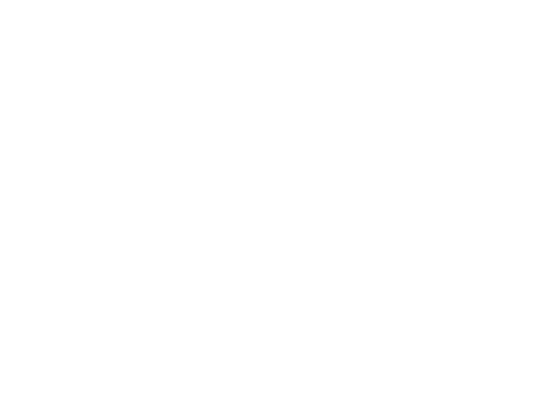

In [5]:
if flag <= 1
    fprintf('How does this work? A "flag" variable was never declared! Why is there all this whitespace below?\n');
end

## Character arrays and strings
Character arrays were originally used to store string data. A “string” data type was added later. It is difficult to predict how code will function.
* strcat() fails to preserve trailing whitespace for character arrays. “For character array inputs, strcat removes trailing ASCII white-space…[However] For cell and string array inputs, strcat does not…” [link](https://www.mathworks.com/matlabcentral/answers/9285-strcat-including-space-i-e)
* Use of square brackets to concatenate character arrays and strings produces a string array, not a single string or character array .

In [6]:
c = 'good ';            % Character array 
s = "good ";            % String, use string() in some versions

disp(      [c 'day']);  % "good day"
disp(      [s 'day']);  % "good"    "day"

disp(strcat(c,'day'));  % "goodday" 
disp(strcat(s,'day'));  % "good day" 

fprintf(   [c 'day']);  % "good day" 
fprintf(   [s 'day']);  % !!! ERROR !!! (works in Octave)

good day
good day
goodday
goodday
good day
good day
good daygood day


* strcmp() does not provide lexicographic distance (three-way comparison). It returns 1 if the differences between values is 0. This differs and is opposite from the earlier implementation of the identically named funciton in C.  

In [39]:
strcmp('abc','abc')
strcmp('abc','xyz')

ans =  1
ans = 0


## Initializing object properties is unintuitive. 
"Evaluation of property default values occurs only when the value is first needed, and only once when MATLAB first initializes the class. MATLAB does not reevaluate the expression each time you create an instance of the class." [link](https://www.mathworks.com/help/matlab/matlab_oop/specifying-properties.html)

In [45]:
classdef Test
    properties
        timestamp = datetime();
    end
    
    methods
        function obj = Test()
            disp(obj.timestamp);
        end
    end
    
    methods(Static)
        function run()
            Test();    % Create obj1, display current time
            pause(10); % Wait 10 sec
            Test();    % Create obj2, display IDENTICAL time! 
        end
    end
end

In [47]:
Test.run()


error: `Test' undefined near line 122 column 1


## Default values for function arguments are cumbersome.

In [10]:
function val = inc(a, varargin)   % why not "...b=1)"?
    if ~exist('b', 'var')
        b = 1;
    end
    
    val = a + b';
end

## Can’t use property as a for-loop variable.

In [11]:
classdef Test
    properties
        i;
    end
    
    methods
        function obj = Test()
            for obj.i=1:10      % !!! ERROR !!!
                if something(obj.i)
                    break;
                end
            end
        end
    end
end


## Logical expressions are tricky.

In [12]:
if 1 == 1 && 1 == 1
    disp('True');         % "True"
end

if [1 1] == [1 1]
    disp('True');         % "True"
end

if [1 1] == [1 1] && [1 1] == [1 1]    % !!! ERROR !!!
    disp('True');          
end

True
True
True


## Adding to empty array ("[]") is unintuitive. 

In [28]:
x = []
x = x + 1
x = [x ' ']

x = [](0x0)
x = [](0x0)
x =  


## Appending a function handle to a cell array calls the function!

In [14]:
a = @(x) 1;

In [15]:
x = {'1',2};

In [16]:
[a,x]

ans = 
{
  [1,1] =

@(x) 1

  [1,2] = 1
  [1,3] =  2
}


In [17]:
[1,x]

ans = 
{
  [1,1] =  1
  [1,2] = 1
  [1,3] =  2
}


In [18]:
{a, x{:}}

ans = 
{
  [1,1] =

@(x) 1

  [1,2] = 1
  [1,3] =  2
}


## Saving and loading values is a hassle.

In [19]:
save('value.mat',2+2); 

error: : expecting all arguments to be strings


What? But I want to save a numerical value. Wait, maybe you can only save variables (not values). Let's try this...

In [20]:
x = 2 + 2;
save('myfile.mat',x);

error: : expecting all arguments to be strings


Nope. You must specify the variable's _name_ as a string!

In [21]:
x = 2 + 2;
save('myfile.mat','x');

Great. Now MATLAB warns me that "x may be unused". And, when I rename "x" to be "x_axis_value", I need to remember to manually update "save(..." because refactoring won't catch it. 

Okay, whatever. Now let's load the value...

In [22]:
x = load('myfile.mat');
if x == 4
    disp('This works, right?');
end

error: binary operator `==' not implemented for `scalar struct' by `scalar' operations


What? Why doesn't this work? I just saved it! Turns out that load() returns the value in a struct (for some reason) containing a field with the name of the saved variable.

In [23]:
x = load('myfile.mat');
if x.x == 4
    disp('Finally!');
end

Finally!


Now, if I ever rename x, I've got to remember to also manually update it in two places.

## The exist() function can be tricky.

In [24]:
pwd
ls

ans = /home/communityhub/rcampbel/notebooks
archive		    octave-core
DOCS_AND_EXAMPLES   orthophotos
IPL Demo.ipynb	    part_20170830_F41_GNSS_INS_1cm-3048x3452-4790x4778.xml
MATLAB Sucks.ipynb  plotextraction.ipynb
myfile.mat	    __pycache__


In [6]:
pwd
exist('archive','dir') # (Octave difference)

ans = /home/communityhub/rcampbel/notebooks
ans =  7


## NaN is tricky

In [1]:
1 == true
0 == false
NaN == true
NaN == false
NaN == NaN
x = NaN
y = NaN
x == y 
isnan(x) % Must always check all numbers for possible NaNs

ans =  1
ans =  1
ans = 0
ans = 0
ans = 0
x = NaN
y = NaN
ans = 0
ans =  1


## Element-wise comparison is tricky

In [4]:
[] |  [true]  
[] |   true  
[] || [true]

ans = [](0x0)
ans = [](0x0)
ans =  1


## More info

[link](http://neuroplausible.com/matlab)
[link](http://www.inferencelab.com/matlab-rant-2/)
[link](https://www.nayuki.io/page/matlab-language-pet-peeves)


Octave's search path contains the following directories:

.
/apps/share64/debian7/anaconda/anaconda3-5.1/lib/python3.6/site-packages/octave_kernel
/usr/lib/x86_64-linux-gnu/octave/packages/signal-1.1.3/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/signal-1.1.3
/usr/lib/x86_64-linux-gnu/octave/packages/specfun-1.1.0/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/specfun-1.1.0
/usr/lib/x86_64-linux-gnu/octave/packages/optim-1.2.0/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/optim-1.2.0
/usr/lib/x86_64-linux-gnu/octave/packages/miscellaneous-1.1.0/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/miscellaneous-1.1.0
/usr/lib/x86_64-linux-gnu/octave/packages/struct-1.0.10/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/struct-1.0.10
/usr/lib/x86_64-linux-gnu/octave/packages/image-1.0.15/x86_64-pc-linux-gnu-api-v48+
/usr/share/octave/packages/image-1.0.15
/usr/lib/x86_64-linux-gnu/octave/packages/control-2.3.52/x86_64-pc-linux-gnu-api-v48+
/usr/s